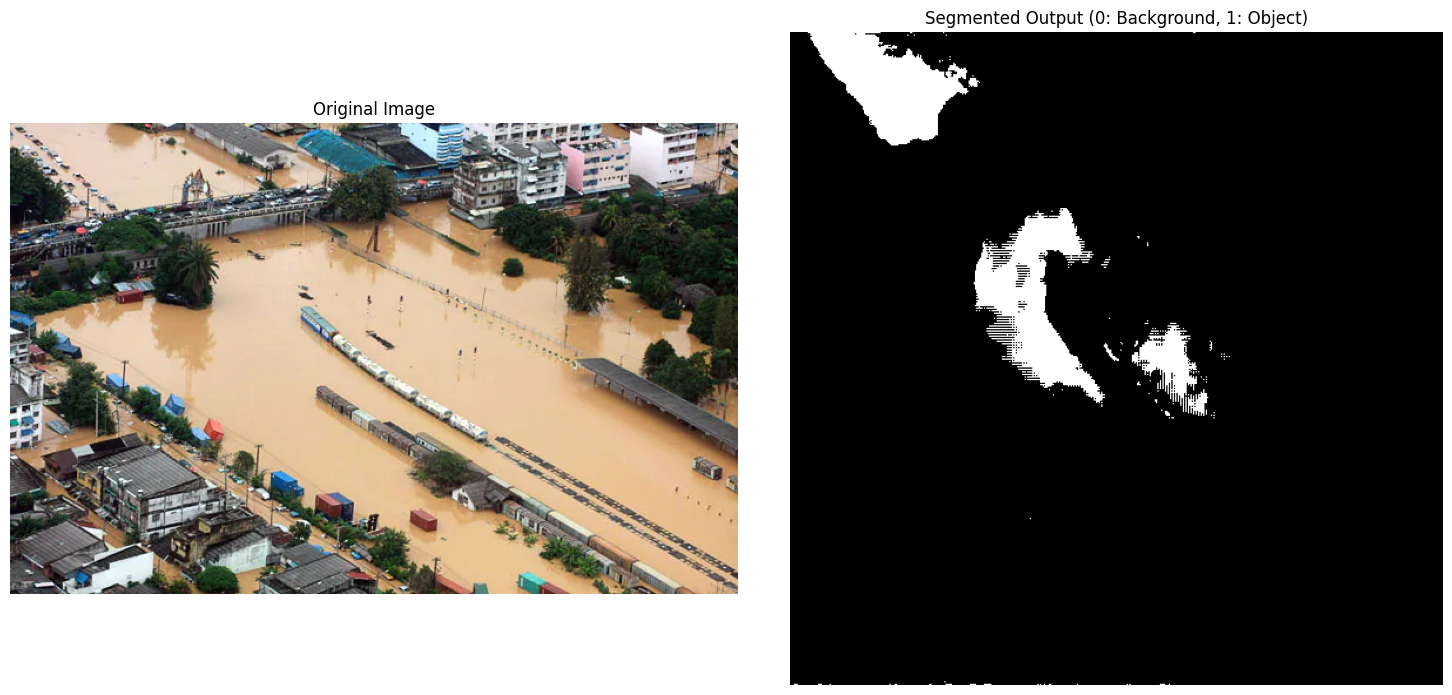

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from UnetMB import UnetMB  # 학습된 모델 클래스

# 모델 경로
MODEL_PATH = "/home/work/XAI/Unet/unetMB.pth"

# 이미지 전처리 함수
def preprocess_image(image_path, input_size=(512, 512)):
    """
    입력 이미지를 모델 입력 크기에 맞게 전처리합니다.
    
    Args:
        image_path (str): 입력 이미지 경로
        input_size (tuple): 모델 입력 크기 (기본값: (512, 512))
    
    Returns:
        torch.Tensor: 전처리된 이미지 텐서
    """
    transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # 배치 차원을 추가


# 예측 결과 시각화 함수
def visualize_segmentation(image_path, model, device):
    """
    입력 이미지에 대해 객체와 배경을 분할한 결과를 시각화합니다.
    
    Args:
        image_path (str): 입력 이미지 경로
        model (torch.nn.Module): 학습된 U-Net 모델
        device (torch.device): 사용할 디바이스 (CPU 또는 GPU)
    
    Returns:
        None
    """
    # 이미지 전처리
    input_image = preprocess_image(image_path).to(device)
    
    # 원본 이미지 로드
    original_image = Image.open(image_path).convert("RGB")
    
    # 모델 예측
    model.eval()
    with torch.no_grad():
        output = model(input_image)
        pred_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()  # 배치와 채널 차원을 제거

    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(pred_mask, cmap="gray")
    axes[1].set_title("Segmented Output (0: Background, 1: Object)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


# 실행 코드
if __name__ == "__main__":
    # 디바이스 설정
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # 학습된 모델 로드
    model = UnetMB()  # U-Net 모델 생성
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model = model.to(device)
    
    # 입력 이미지 경로
    input_image_path = "/home/work/XAI/Unet/dataset/Flood/val/Image/9.jpg"
    
    # Segmentation 시각화
    visualize_segmentation(input_image_path, model, device)
